In [1]:
library(class)
library(caret)
library(e1071)

Loading required package: lattice
Loading required package: ggplot2


In [2]:
knn_data <- read.csv("../../datasets/knn.csv")
head(knn_data)
levels(knn_data$level)

age,salary,level
30,250000,Level A
20,400000,Level A
35,300000,Level A
24,270000,Level A
26,380000,Level A
21,320000,Level A


[1] "Level A" "Level B"

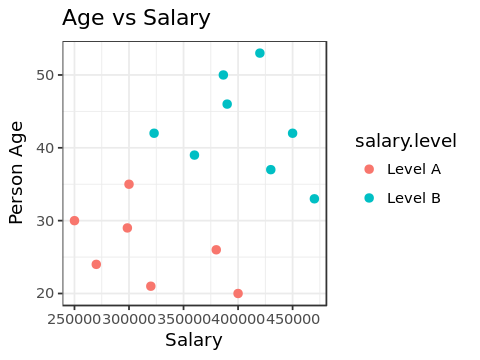

In [3]:
# Visualizing the data
salary.level <- knn_data$level
options(repr.plot.width=4, repr.plot.height=3)
ggplot()+
          geom_point(aes(knn_data$salary, knn_data$age,col = salary.level), cex = 2) +
          xlab("Salary") + ylab("Person Age") + ggtitle("Age vs Salary") +
          labs("Salary Levels") +
          theme_bw() 

In [4]:
# Consider a data point at (salary, age) = (298500, 29). Let us find its category by calculating 
# its distance from rest of the data points, assuming k = 1.

coor_point <- c(29,298500)
for (i in 1:nrow(knn_data)){
  print(paste("ED =", round(dist(rbind(coor_point,knn_data[i,c(1,2)])),2)))
}

[1] "ED = 48500"
[1] "ED = 101500"
[1] "ED = 1500.01"
[1] "ED = 28500"
[1] "ED = 81500"
[1] "ED = 21500"
[1] "ED = 171500"
[1] "ED = 131500"
[1] "ED = 61505"
[1] "ED = 151500"
[1] "ED = 88000"
[1] "ED = 91500"
[1] "ED = 24500"
[1] "ED = 121500"
[1] "ED = 0"


In [5]:
# Above result has higher bias towards salary values which can sometimes affect the overall results. 
# Therefore, it is advisable to remove such biased results by normalizing both the scales.

# Normalizing the data by min-max normalization method with range of values in [0,1]
norm_func <- function(x){
  return((x-min(x))/(max(x)-min(x)))
}

knn_data_norm <- data.frame(sapply(knn_data[,1:2], norm_func))
head(knn_data_norm)

age,salary
0.30303030,0.00000000
0.00000000,0.68181818
0.45454545,0.22727273
0.12121212,0.09090909
0.18181818,0.59090909
0.03030303,0.31818182


In [6]:
# Finding distance once again after normalizing
coor_point <- knn_data_norm[15,]                # Fetching normalized value of (29, 298500)
for (i in 1:nrow(knn_data_norm)){
  print(paste("ED =", round(dist(rbind(coor_point,knn_data_norm[i,])),2)))
}
# this time we can observe that data reveals more clarification with the removal of bias towards salary

[1] "ED = 0.22"
[1] "ED = 0.54"
[1] "ED = 0.18"
[1] "ED = 0.2"
[1] "ED = 0.38"
[1] "ED = 0.26"
[1] "ED = 0.79"
[1] "ED = 0.65"
[1] "ED = 0.41"
[1] "ED = 0.79"
[1] "ED = 0.75"
[1] "ED = 0.66"
[1] "ED = 0.41"
[1] "ED = 0.91"
[1] "ED = 0"


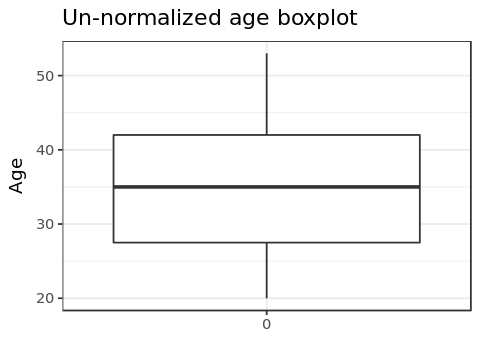

In [7]:
# Ensuring shape and structure of normalized data is similar to unnormalized data
# -----------------verifying values by plotting boxplot--------------------------
ggplot() +
  geom_boxplot(aes(factor(0),knn_data$age)) +
  xlab("") + ylab("Age") + ggtitle("Un-normalized age boxplot") +
  theme_bw()

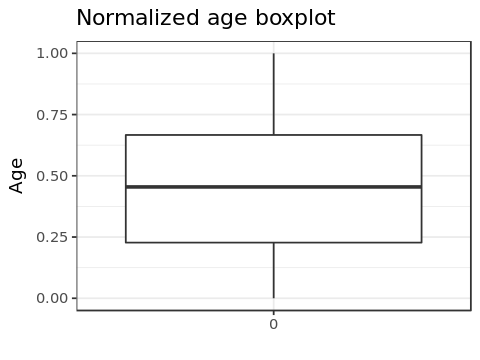

In [8]:
ggplot() +
  geom_boxplot(aes(factor(0),knn_data_norm$age)) +
  xlab("") + ylab("Age") + ggtitle("Normalized age boxplot") +
  theme_bw()

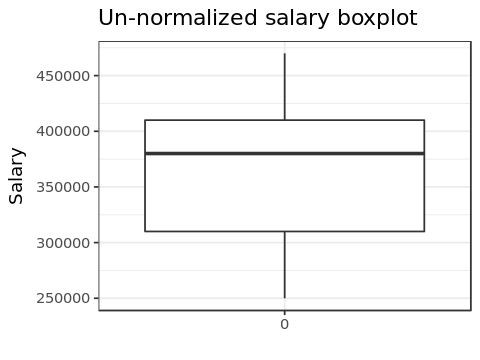

In [9]:
ggplot() +
  geom_boxplot(aes(factor(0),knn_data$salary)) +
  xlab("") + ylab("Salary") + ggtitle("Un-normalized salary boxplot") +
  theme_bw()

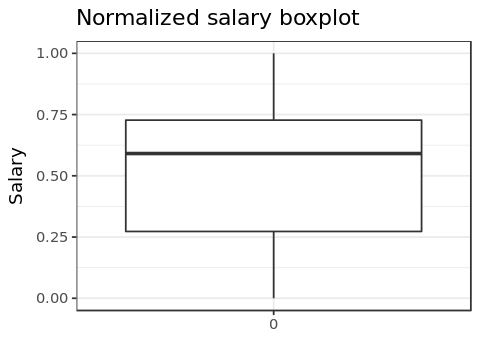

In [10]:
ggplot() +
  geom_boxplot(aes(factor(0),knn_data_norm$salary)) +
  xlab("") + ylab("Salary") + ggtitle("Normalized salary boxplot") +
  theme_bw()

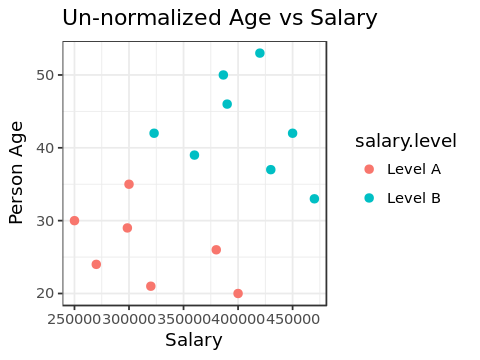

In [11]:
# ----------------verifying structure by plotting scatter plot------------------
ggplot() +
  geom_point(aes(knn_data$salary, knn_data$age,col = salary.level), cex = 2) +
  xlab("Salary") + ylab("Person Age") + ggtitle("Un-normalized Age vs Salary") +
  labs("Salary Levels") +
  theme_bw() 

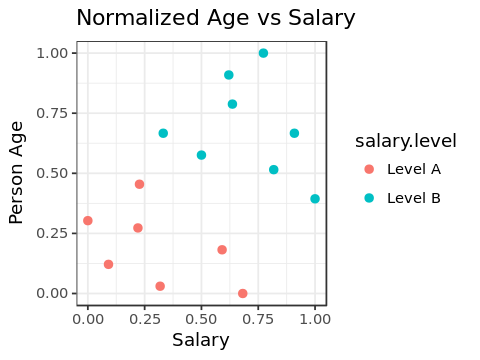

In [12]:
ggplot() +
  geom_point(aes(knn_data_norm$salary, knn_data_norm$age,col = salary.level), cex = 2) +
  xlab("Salary") + ylab("Person Age") + ggtitle("Normalized Age vs Salary") +
  labs("Salary Levels") +
  theme_bw()

In [13]:
# Making train and test data
set.seed(42)
ind <- sample(x = nrow(knn_data_norm), size = floor(0.70 * nrow(knn_data_norm)))

knn_train <- knn_data_norm[ind,]
knn_test <- knn_data_norm[-ind,]

knn_train_level <- knn_data[ind,3]
knn_test_level <- knn_data[-ind,3]

# Building kNN model
knn_model <- knn(knn_train, knn_test, cl = knn_train_level, k = 1)
knn_model

[1] Level A Level A Level B Level B Level B
Levels: Level A Level B

In [14]:
# Finding the accuracy of the model
addmargins(table(knn_test_level, knn_model)) # 100% accurate

,Level A,Level B,Sum
Level A,2,0,2
Level B,0,3,3
Sum,2,3,5


In [15]:
# Finding best value of k (manually)
for (i in 1:10){
  knn_model <- knn(knn_train, knn_test, cl = knn_train_level, k = i)
  conf_mat <- addmargins(table(knn_test_level, knn_model))
  print(paste("Accuracy at k = ", i, "is ", ((conf_mat[1]+conf_mat[5])/conf_mat[9])*100, "%"))
}
# As seen here, accuracy is less with k = 2. It is not advisable to pass even values of k 
# if there are binary classes (here, Level A and Level B).

[1] "Accuracy at k =  1 is  100 %"
[1] "Accuracy at k =  2 is  80 %"
[1] "Accuracy at k =  3 is  100 %"
[1] "Accuracy at k =  4 is  100 %"
[1] "Accuracy at k =  5 is  100 %"
[1] "Accuracy at k =  6 is  100 %"
[1] "Accuracy at k =  7 is  100 %"
[1] "Accuracy at k =  8 is  80 %"
[1] "Accuracy at k =  9 is  100 %"
[1] "Accuracy at k =  10 is  40 %"


In [16]:
# Finding best value of k (CV)

knn_train$level <- knn_train_level
ctrl <- trainControl(method = "cv")
knn_cv <- train(level~., data = knn_train, 
                trControl = ctrl, 
                method = "knn", 
                tuneLength = 3,                   # 3 fold CV
                tuneGrid = data.frame(k = 1:10))
knn_cv   # k = 7 is best

Warning message in knn3Train(train = structure(c(0.272727272727273, 0.121212121212121, :
“k = 10 exceeds number 9 of patterns”Warning message in knn3Train(train = structure(c(1, 0.121212121212121, 0.666666666666667, :
“k = 10 exceeds number 9 of patterns”Warning message in knn3Train(train = structure(c(1, 0.272727272727273, 0.666666666666667, :
“k = 10 exceeds number 9 of patterns”Warning message in knn3Train(train = structure(c(1, 0.272727272727273, 0.121212121212121, :
“k = 10 exceeds number 9 of patterns”Warning message in knn3Train(train = structure(c(1, 0.272727272727273, 0.121212121212121, :
“k = 10 exceeds number 9 of patterns”Warning message in knn3Train(train = structure(c(1, 0.272727272727273, 0.121212121212121, :
“k = 10 exceeds number 9 of patterns”Warning message in knn3Train(train = structure(c(1, 0.272727272727273, 0.121212121212121, :
“k = 10 exceeds number 9 of patterns”Warning message in knn3Train(train = structure(c(1, 0.272727272727273, 0.121212121212121, :
“k = 10 

k-Nearest Neighbors 

10 samples
 2 predictor
 2 classes: 'Level A', 'Level B' 

No pre-processing
Resampling: Cross-Validated (10 fold) 
Summary of sample sizes: 9, 9, 9, 9, 9, 9, ... 
Resampling results across tuning parameters:

  k   Accuracy  Kappa
   1  1.0       NaN  
   2  1.0       NaN  
   3  0.9         0  
   4  0.9         0  
   5  1.0       NaN  
   6  1.0       NaN  
   7  1.0       NaN  
   8  0.4         0  
   9  0.0         0  
  10  0.0         0  

Accuracy was used to select the optimal model using the largest value.
The final value used for the model was k = 7.

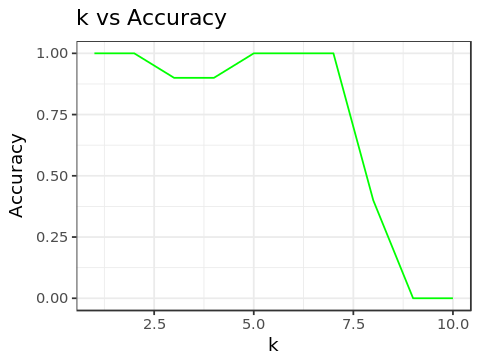

In [17]:
ggplot() +
          geom_line(aes(knn_cv$results$k, knn_cv$results$Accuracy), col = "green") +
          xlab("k") + ylab("Accuracy") + ggtitle("k vs Accuracy") +
          theme_bw()